In [ ]:
!git clone https://github.com/sid19arya/VeSuRa.git
!pip install svgelements

Cloning into 'VeSuRa'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 52 (delta 20), reused 47 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 13.62 KiB | 253.00 KiB/s, done.
Resolving deltas: 100% (20/20), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import wandb
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sid19arya (sid19arya-university-of-toronto) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import sys
import importlib
sys.path.append('/content/VeSuRa/utils') # Add the repository root to the Python path if needed for broader imports

# Example: Importing modules from the 'utils' subdirectory
from load_emojy_dataset import get_emojysvg_dataloaders
import run_experiments
importlib.reload(run_experiments)
from run_experiments import initialize_model_and_optimizer, intitate_wandb_run, execute_run, log_artifacts

print("Successfully imported VeSuRa modules")


Successfully imported VeSuRa modules


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:

emojy_data_dir = '/content/drive/My Drive/MScAC/CSC2503/Project/data2/EmojySvg/'
full_set, train_set, test_set, train_loader, test_loader = get_emojysvg_dataloaders(emojy_data_dir, max_curves=4, max_paths_per_curve=4, viewbox_size=128, batch_size=16)

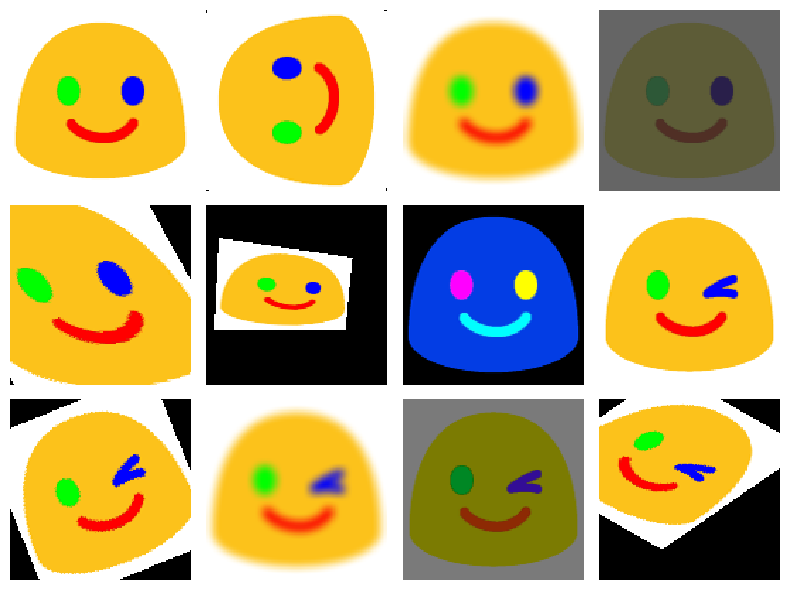

In [ ]:
# plot images and svgs
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(8, 6))

for i in range(12):
    ax = axes[i // 4, i % 4]

    img = full_set[i]['image']
    img = img.permute(1, 2, 0).detach().cpu().numpy()  # (H, W, C)

    ax.imshow(img, interpolation='nearest')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# test experiemtn

config_500_epoch_1rl = {
    "num_epochs": 500,
    "lambda_svg_start": 1.0,
    "lambda_mask_start": 1.0,
    "lambda_raster_start": 1.0
}
config_500_epoch_0rl = {
    "num_epochs": 500,
    "lambda_svg_start": 1.0,
    "lambda_mask_start": 1.0,
    "lambda_raster_start": 0.0
}
config_1000_epoch_1rl = {
    "num_epochs": 1000,
    "lambda_svg_start": 1.0,
    "lambda_mask_start": 1.0,
    "lambda_raster_start": 1.0
}
config_1000_epoch_0rl = {
    "num_epochs": 1000,
    "lambda_svg_start": 1.0,
    "lambda_mask_start": 1.0,
    "lambda_raster_start": 0.0
}
configs = [config_500_epoch_1rl, config_500_epoch_0rl, config_1000_epoch_1rl, config_1000_epoch_0rl]


In [ ]:
run_names = []
for config in configs:
  run = intitate_wandb_run(config)

  run_name = f"epochs:{config['num_epochs']}_lambda_raster:{config['lambda_raster_start']}; title: {run.name}"
  run_names.append(run_name)

  model, optimizer = initialize_model_and_optimizer(device)
  train_losses, val_losses = execute_run(model, optimizer, train_loader, test_loader, run, config, device)
  log_artifacts(model, run, test_set, device)
  run.finish()




/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
  0%|          | 2/500 [00:02<08:38,  1.04s/it]


            epoch: loss: f0.0571, r: f0.7139, m: 0.004889, v: f0.7089
                
Validatinon val=0.2315, r=0.1487, fm=0.0004, fv=0.0824


 10%|█         | 52/500 [00:14<02:07,  3.51it/s]


            epoch: loss: f0.0066, r: f0.0923, m: 0.000013, v: f0.0715
                
Validatinon val=0.0343, r=0.0215, fm=0.0000, fv=0.0128


 20%|██        | 102/500 [00:26<01:58,  3.37it/s]


            epoch: loss: f0.0048, r: f0.0571, m: 0.000009, v: f0.0626
                
Validatinon val=0.0247, r=0.0127, fm=0.0000, fv=0.0120


 30%|███       | 152/500 [00:37<01:18,  4.43it/s]


            epoch: loss: f0.0038, r: f0.0452, m: 0.000006, v: f0.0502
                
Validatinon val=0.0246, r=0.0115, fm=0.0000, fv=0.0131


 40%|████      | 202/500 [00:49<01:11,  4.19it/s]


            epoch: loss: f0.0019, r: f0.0331, m: 0.000004, v: f0.0152
                
Validatinon val=0.0165, r=0.0105, fm=0.0000, fv=0.0060


 50%|█████     | 252/500 [01:02<01:03,  3.90it/s]


            epoch: loss: f0.0025, r: f0.0384, m: 0.000002, v: f0.0235
                
Validatinon val=0.0406, r=0.0340, fm=0.0000, fv=0.0066


 60%|██████    | 302/500 [01:14<00:45,  4.36it/s]


            epoch: loss: f0.0014, r: f0.0266, m: 0.000001, v: f0.0076
                
Validatinon val=0.0214, r=0.0165, fm=0.0000, fv=0.0049


 70%|███████   | 352/500 [01:26<00:34,  4.32it/s]


            epoch: loss: f0.0012, r: f0.0238, m: 0.000001, v: f0.0052
                
Validatinon val=0.0159, r=0.0107, fm=0.0000, fv=0.0051


 80%|████████  | 402/500 [01:39<00:22,  4.32it/s]


            epoch: loss: f0.0011, r: f0.0231, m: 0.000001, v: f0.0042
                
Validatinon val=0.0246, r=0.0193, fm=0.0000, fv=0.0054


 90%|█████████ | 452/500 [01:52<00:11,  4.15it/s]


            epoch: loss: f0.0009, r: f0.0161, m: 0.000000, v: f0.0057
                
Validatinon val=0.0127, r=0.0083, fm=0.0000, fv=0.0045


100%|██████████| 500/500 [02:03<00:00,  4.04it/s]


train_l_mask,█▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_raster,█▃▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_svg,█▇▅▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,███▄▃▃▃▃▃▂▂▂▁▂▁▂▂▂▁▁▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_mask,█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_raster,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▂▁▂▁▁▁▁▃▃▁▁▁▁▂▁▁▁▁▁▁
val_l_svg,█▇▃▃▃▂▃▃▃▂▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▄▄▃▃▂▂▂▂▂▃▂▂▂▂▂▁▁▃▂▁▂▁▁▂▁▃▁▂▁▁▁▁▁▁▁▁▁
train_l_mask,0.0
train_l_raster,0.01954
train_l_svg,0.00261


  0%|          | 2/500 [00:00<02:06,  3.95it/s]


            epoch: loss: f0.0136, r: f1.0515, m: 0.000398, v: f0.3397
                
Validatinon val=0.0559, r=0.2095, fm=0.0000, fv=0.0558


 10%|█         | 52/500 [00:12<01:44,  4.27it/s]


            epoch: loss: f0.0028, r: f1.0554, m: 0.000013, v: f0.0699
                
Validatinon val=0.0135, r=0.2169, fm=0.0000, fv=0.0135


 20%|██        | 102/500 [00:24<01:36,  4.14it/s]


            epoch: loss: f0.0020, r: f1.0570, m: 0.000006, v: f0.0492
                
Validatinon val=0.0125, r=0.2196, fm=0.0000, fv=0.0125


 30%|███       | 152/500 [00:36<01:36,  3.61it/s]


            epoch: loss: f0.0022, r: f1.0539, m: 0.000004, v: f0.0540
                
Validatinon val=0.0128, r=0.2144, fm=0.0000, fv=0.0128


 40%|████      | 202/500 [00:48<01:18,  3.81it/s]


            epoch: loss: f0.0015, r: f1.0539, m: 0.000001, v: f0.0375
                
Validatinon val=0.0091, r=0.2152, fm=0.0000, fv=0.0091


 50%|█████     | 252/500 [01:00<00:57,  4.32it/s]


            epoch: loss: f0.0005, r: f1.0553, m: 0.000001, v: f0.0134
                
Validatinon val=0.0067, r=0.2150, fm=0.0000, fv=0.0067


 60%|██████    | 302/500 [01:12<00:45,  4.40it/s]


            epoch: loss: f0.0004, r: f1.0542, m: 0.000000, v: f0.0105
                
Validatinon val=0.0065, r=0.2135, fm=0.0000, fv=0.0065


 70%|███████   | 352/500 [01:24<00:34,  4.32it/s]


            epoch: loss: f0.0007, r: f1.0594, m: 0.000000, v: f0.0170
                
Validatinon val=0.0087, r=0.2153, fm=0.0000, fv=0.0087


 80%|████████  | 402/500 [01:36<00:22,  4.40it/s]


            epoch: loss: f0.0001, r: f1.0539, m: 0.000000, v: f0.0036
                
Validatinon val=0.0055, r=0.2144, fm=0.0000, fv=0.0055


 90%|█████████ | 452/500 [01:48<00:10,  4.39it/s]


            epoch: loss: f0.0001, r: f1.0514, m: 0.000000, v: f0.0024
                
Validatinon val=0.0057, r=0.2144, fm=0.0000, fv=0.0057


100%|██████████| 500/500 [02:00<00:00,  4.16it/s]


train_l_mask,█▆▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_raster,▄▄▁▃▃▅▆▅▆▆▅▅▅█▇▅▆▆▆▅▄▅▅▇▃▅▇▆▅▅▃█▂▆▇▂▅▅▆▅
train_l_svg,█▄▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_mask,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_raster,▁▁▁▂▁▂█▃▁▂▅▆▃▃▃▄▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
val_l_svg,█▇▃▃▂▃▂▃▃▂▃▃▂▂▂▂▃▂▂▂▃▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▇▇▇▆▆▆▇▅▅▅█▇▆▄▄▅▅▄▅▄▂▂▃▄█▃▄▃▂▂▂▂▁▁▂▂▂▂▁▂
train_l_mask,0.0
train_l_raster,1.0586
train_l_svg,0.00187


  0%|          | 2/1000 [00:00<04:08,  4.02it/s]


            epoch: loss: f0.0493, r: f0.7625, m: 0.000775, v: f0.4698
                
Validatinon val=0.2269, r=0.1670, fm=0.0001, fv=0.0598


  5%|▌         | 52/1000 [00:12<03:43,  4.24it/s]


            epoch: loss: f0.0072, r: f0.1087, m: 0.000018, v: f0.0700
                
Validatinon val=0.0620, r=0.0478, fm=0.0000, fv=0.0142


 10%|█         | 102/1000 [00:25<04:30,  3.32it/s]


            epoch: loss: f0.0052, r: f0.0703, m: 0.000009, v: f0.0593
                
Validatinon val=0.0420, r=0.0284, fm=0.0000, fv=0.0136


 15%|█▌        | 152/1000 [00:37<03:41,  3.83it/s]


            epoch: loss: f0.0025, r: f0.0421, m: 0.000006, v: f0.0215
                
Validatinon val=0.0371, r=0.0280, fm=0.0000, fv=0.0090


 20%|██        | 202/1000 [00:48<03:06,  4.28it/s]


            epoch: loss: f0.0017, r: f0.0312, m: 0.000003, v: f0.0102
                
Validatinon val=0.0221, r=0.0156, fm=0.0000, fv=0.0065


 25%|██▌       | 252/1000 [01:01<02:51,  4.37it/s]


            epoch: loss: f0.0014, r: f0.0280, m: 0.000002, v: f0.0075
                
Validatinon val=0.0222, r=0.0161, fm=0.0000, fv=0.0060


 30%|███       | 302/1000 [01:13<02:38,  4.40it/s]


            epoch: loss: f0.0010, r: f0.0210, m: 0.000001, v: f0.0049
                
Validatinon val=0.0225, r=0.0167, fm=0.0000, fv=0.0058


 35%|███▌      | 352/1000 [01:25<02:28,  4.37it/s]


            epoch: loss: f0.0004, r: f0.0064, m: 0.000001, v: f0.0038
                
Validatinon val=0.0108, r=0.0075, fm=0.0000, fv=0.0033


 40%|████      | 402/1000 [01:37<02:16,  4.39it/s]


            epoch: loss: f0.0010, r: f0.0203, m: 0.000001, v: f0.0040
                
Validatinon val=0.0167, r=0.0122, fm=0.0000, fv=0.0044


 45%|████▌     | 452/1000 [01:49<02:07,  4.28it/s]


            epoch: loss: f0.0002, r: f0.0024, m: 0.000001, v: f0.0025
                
Validatinon val=0.0117, r=0.0089, fm=0.0000, fv=0.0029


 50%|█████     | 502/1000 [02:01<02:00,  4.14it/s]


            epoch: loss: f0.0002, r: f0.0022, m: 0.000001, v: f0.0025
                
Validatinon val=0.0309, r=0.0260, fm=0.0000, fv=0.0049


 55%|█████▌    | 552/1000 [02:13<02:02,  3.66it/s]


            epoch: loss: f0.0002, r: f0.0027, m: 0.000000, v: f0.0022
                
Validatinon val=0.0328, r=0.0287, fm=0.0000, fv=0.0040


 60%|██████    | 602/1000 [02:25<01:45,  3.78it/s]


            epoch: loss: f0.0001, r: f0.0017, m: 0.000000, v: f0.0015
                
Validatinon val=0.0099, r=0.0066, fm=0.0000, fv=0.0032


 65%|██████▌   | 652/1000 [02:36<01:19,  4.40it/s]


            epoch: loss: f0.0001, r: f0.0014, m: 0.000000, v: f0.0013
                
Validatinon val=0.0114, r=0.0083, fm=0.0000, fv=0.0031


 70%|███████   | 702/1000 [02:48<01:09,  4.28it/s]


            epoch: loss: f0.0001, r: f0.0011, m: 0.000000, v: f0.0011
                
Validatinon val=0.0115, r=0.0083, fm=0.0000, fv=0.0032


 75%|███████▌  | 752/1000 [03:00<00:56,  4.39it/s]


            epoch: loss: f0.0001, r: f0.0010, m: 0.000000, v: f0.0010
                
Validatinon val=0.0130, r=0.0097, fm=0.0000, fv=0.0033


 80%|████████  | 802/1000 [03:13<00:54,  3.63it/s]


            epoch: loss: f0.0001, r: f0.0009, m: 0.000000, v: f0.0009
                
Validatinon val=0.0168, r=0.0132, fm=0.0000, fv=0.0036


 85%|████████▌ | 852/1000 [03:25<00:33,  4.40it/s]


            epoch: loss: f0.0001, r: f0.0008, m: 0.000000, v: f0.0008
                
Validatinon val=0.0177, r=0.0143, fm=0.0000, fv=0.0034


 90%|█████████ | 902/1000 [03:37<00:22,  4.36it/s]


            epoch: loss: f0.0001, r: f0.0007, m: 0.000000, v: f0.0007
                
Validatinon val=0.0269, r=0.0230, fm=0.0000, fv=0.0038


 95%|█████████▌| 952/1000 [03:49<00:11,  4.21it/s]


            epoch: loss: f0.0001, r: f0.0007, m: 0.000000, v: f0.0008
                
Validatinon val=0.0255, r=0.0217, fm=0.0000, fv=0.0037


100%|██████████| 1000/1000 [04:01<00:00,  4.15it/s]


train_l_mask,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_raster,█▇▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_svg,█▇▆▅▄▂▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_mask,█▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_raster,█▄▆▃▄▇▂▃▃▄▃▂▁▁▂▂▂▂▂▆▆▁▁▁▁▂▁▁▁▂▂▃▃▆▅▅▅▅▅▅
val_l_svg,█▆▃▂▃▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▃▃▄▃▂▂▂▃▂▂▂▁▁▁▁▁▁▁▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂
train_l_mask,0.0
train_l_raster,0.00062
train_l_svg,0.00066


  0%|          | 2/1000 [00:00<04:12,  3.96it/s]


            epoch: loss: f0.0190, r: f0.9837, m: 0.001226, v: f0.4727
                
Validatinon val=0.0566, r=0.1967, fm=0.0001, fv=0.0565


  5%|▌         | 52/1000 [00:12<03:43,  4.24it/s]


            epoch: loss: f0.0029, r: f0.9882, m: 0.000037, v: f0.0721
                
Validatinon val=0.0133, r=0.1991, fm=0.0000, fv=0.0133


 10%|█         | 102/1000 [00:24<03:46,  3.96it/s]


            epoch: loss: f0.0022, r: f0.9839, m: 0.000023, v: f0.0544
                
Validatinon val=0.0134, r=0.2014, fm=0.0000, fv=0.0134


 15%|█▌        | 152/1000 [00:36<03:49,  3.70it/s]


            epoch: loss: f0.0014, r: f0.9900, m: 0.000016, v: f0.0345
                
Validatinon val=0.0112, r=0.1998, fm=0.0000, fv=0.0112


 20%|██        | 202/1000 [00:48<03:26,  3.87it/s]


            epoch: loss: f0.0010, r: f0.9835, m: 0.000015, v: f0.0260
                
Validatinon val=0.0087, r=0.2093, fm=0.0000, fv=0.0087


 25%|██▌       | 252/1000 [01:00<02:51,  4.37it/s]


            epoch: loss: f0.0007, r: f0.9893, m: 0.000005, v: f0.0185
                
Validatinon val=0.0094, r=0.2021, fm=0.0000, fv=0.0094


 30%|███       | 302/1000 [01:12<02:41,  4.32it/s]


            epoch: loss: f0.0007, r: f0.9853, m: 0.000005, v: f0.0182
                
Validatinon val=0.0070, r=0.2106, fm=0.0000, fv=0.0070


 35%|███▌      | 352/1000 [01:24<02:32,  4.25it/s]


            epoch: loss: f0.0007, r: f0.9872, m: 0.000002, v: f0.0176
                
Validatinon val=0.0080, r=0.2027, fm=0.0000, fv=0.0080


 40%|████      | 402/1000 [01:37<02:19,  4.29it/s]


            epoch: loss: f0.0009, r: f0.9861, m: 0.000002, v: f0.0214
                
Validatinon val=0.0073, r=0.2045, fm=0.0000, fv=0.0073


 45%|████▌     | 452/1000 [01:49<02:06,  4.34it/s]


            epoch: loss: f0.0004, r: f0.9889, m: 0.000001, v: f0.0103
                
Validatinon val=0.0098, r=0.2070, fm=0.0000, fv=0.0098


 50%|█████     | 502/1000 [02:02<01:56,  4.27it/s]


            epoch: loss: f0.0011, r: f0.9887, m: 0.000001, v: f0.0263
                
Validatinon val=0.0175, r=0.2043, fm=0.0000, fv=0.0175


 55%|█████▌    | 552/1000 [02:14<01:49,  4.09it/s]


            epoch: loss: f0.0025, r: f0.9885, m: 0.000000, v: f0.0622
                
Validatinon val=0.0144, r=0.2030, fm=0.0000, fv=0.0144


 60%|██████    | 602/1000 [02:27<01:55,  3.46it/s]


            epoch: loss: f0.0023, r: f0.9891, m: 0.000001, v: f0.0582
                
Validatinon val=0.0133, r=0.2010, fm=0.0000, fv=0.0133


 65%|██████▌   | 652/1000 [02:39<01:34,  3.68it/s]


            epoch: loss: f0.0028, r: f0.9900, m: 0.000000, v: f0.0708
                
Validatinon val=0.0137, r=0.2027, fm=0.0000, fv=0.0137


 70%|███████   | 702/1000 [02:51<01:14,  4.00it/s]


            epoch: loss: f0.0023, r: f0.9878, m: 0.000000, v: f0.0582
                
Validatinon val=0.0132, r=0.2008, fm=0.0000, fv=0.0132


 75%|███████▌  | 752/1000 [03:03<00:59,  4.18it/s]


            epoch: loss: f0.0025, r: f0.9880, m: 0.000000, v: f0.0632
                
Validatinon val=0.0137, r=0.2005, fm=0.0000, fv=0.0137


 80%|████████  | 802/1000 [03:15<00:47,  4.21it/s]


            epoch: loss: f0.0026, r: f0.9882, m: 0.000000, v: f0.0652
                
Validatinon val=0.0133, r=0.2006, fm=0.0000, fv=0.0133


 85%|████████▌ | 852/1000 [03:27<00:34,  4.33it/s]


            epoch: loss: f0.0025, r: f0.9889, m: 0.000000, v: f0.0629
                
Validatinon val=0.0137, r=0.2001, fm=0.0000, fv=0.0137


 90%|█████████ | 902/1000 [03:40<00:22,  4.29it/s]


            epoch: loss: f0.0026, r: f0.9857, m: 0.000000, v: f0.0647
                
Validatinon val=0.0132, r=0.2000, fm=0.0000, fv=0.0132


 95%|█████████▌| 952/1000 [03:52<00:11,  4.30it/s]


            epoch: loss: f0.0027, r: f0.9864, m: 0.000000, v: f0.0686
                
Validatinon val=0.0133, r=0.2041, fm=0.0000, fv=0.0133


100%|██████████| 1000/1000 [04:03<00:00,  4.10it/s]


train_l_mask,█▆▅▆▄▄▄▆▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_l_raster,▂▁███▃▆▃▄▄▃▄▂▅▄▆▃▆▇▁▂▄▄▄▅▄▄▄▇▅▁▁▄▂▄▄▄▁▂▃
train_l_svg,█▇█▇▇▇▅▄▄▃▃▃▃▂▂▁▁▃▁▁▁▁▂▄▃▇▆▆▆▇▇▇▇▆▇▇▇▇▇▇
train_loss,██▇▅▆▄▃▃▂▂▂▁▁▂▁▁▄▃▃▁▆▆▆▆▆▆▆▅▅▇▆▆▇▇▇▇▇▆▆▇
val_l_mask,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_l_raster,▁▁▂▂▂▁▂▁▁▁▂▂▃▃▂▂▃▂▃▂▂█▃▁▂▂▂▂▁▁▂▁▂▂▂▁▁▁▁▁
val_l_svg,█▅▅▄▆▇▅▄▃▂▃▃▂▂▂▂▂▁▃▂▂▆▅▄▆▅▅▄▅▆▅▅▅▅▅▅▅▅▅▅
val_loss,█▄▂▃▃▃▃▂▁▂▁▁▁▁▁▁▁▂▁▃▂▂▂▃▃▂▂▃▃▂▃▃▃▃▃▃▃▃▃▃
train_l_mask,0.0
train_l_raster,0.98566
train_l_svg,0.06954


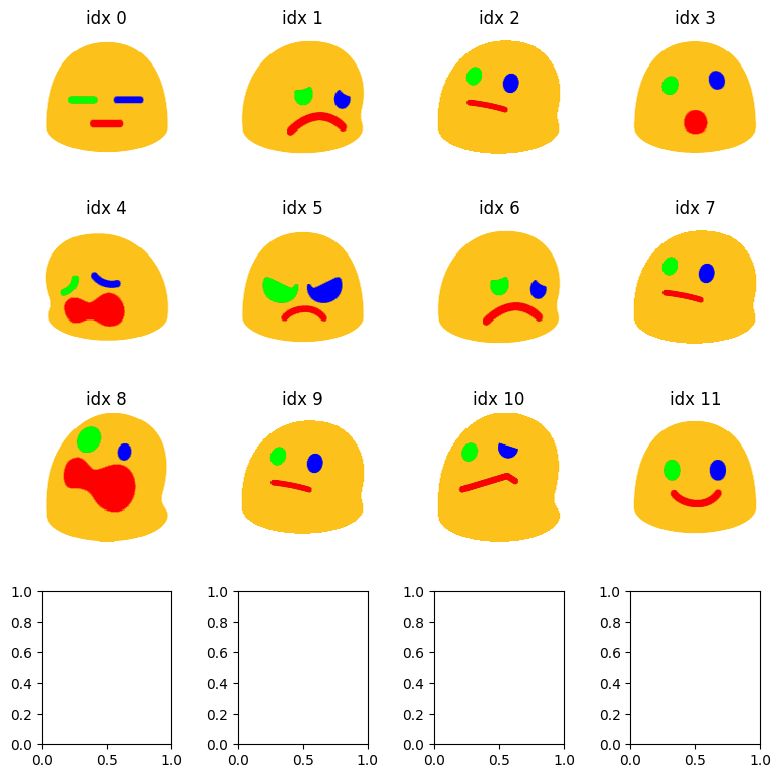

In [ ]:
import torch
import matplotlib.pyplot as plt

# --- Build batch (9 images) ---
imgs = []
for idx in range(0, 12):
    img = test_set[idx]["ground_truth_image"]              # (H, W, C)                      # (C, H, W)
    imgs.append(img)

batch = torch.stack(imgs, dim=0).to(device)           # (9, C, H, W)

# --- Plot in a 3×3 grid ---
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(0, 12):
    ax = axes[i // 4][i % 4]
    img = batch[i].permute(1, 2, 0).detach().cpu().numpy()  # (H, W, C)
    ax.imshow(img, interpolation='nearest')
    ax.set_title(f"idx {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()